# 12. Local features + Homography – localizing objects

In [1]:
import cv2
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

### Develop a program that tries to detect a given object in an image, delineating the countour of the object in the image

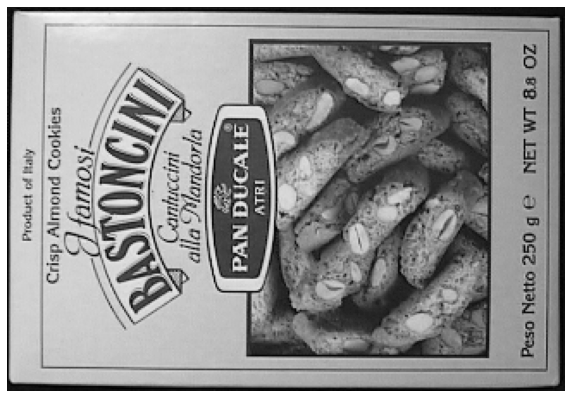

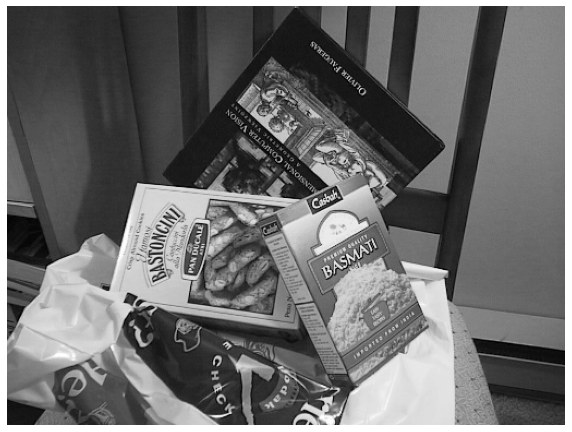

In [2]:
object_image = cv2.imread("Images/match_box01a_1.png", cv2.IMREAD_GRAYSCALE) 
scene_image = cv2.imread("Images/match_box01a_2.png", cv2.IMREAD_GRAYSCALE) 

plt.rcParams['figure.figsize'] = [10, 10]

show_image(object_image)
show_image(scene_image)

In [11]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
keypoints_object, descriptors_object = sift.detectAndCompute(object_image, None)
keypoints_scene, descriptors_scene = sift.detectAndCompute(scene_image, None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = {"checks": 50}

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors_object, descriptors_scene, k=2)

# Filter matches using the Lowe's ratio test
ratio_thresh = 0.75
good_matches = []

for m, n in matches:    
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)

match_output = cv2.drawMatchesKnn(
    object_image,
    keypoints_object,
    scene_image,
    keypoints_scene,
    matches,
    good_matches,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

show_image(match_output)


error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'drawMatchesKnn'
> Overload resolution failed:
>  - outImg is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'outImg'


In [ ]:
# Localize the object
obj = np.empty((len(good_matches), 2), dtype=np.float32)
scene = np.empty((len(good_matches), 2), dtype=np.float32)

for i in range(len(good_matches)):
    # Get the keypoints from the good matches
    obj[i, 0] = keypoints_obj[good_matches[i].queryIdx].pt[0]
    obj[i, 1] = keypoints_obj[good_matches[i].queryIdx].pt[1]
    scene[i, 0] = keypoints_scene[good_matches[i].trainIdx].pt[0]
    scene[i, 1] = keypoints_scene[good_matches[i].trainIdx].pt[1]

H, _ = cv2.findHomography(object_image, scene_image, cv2.RANSAC)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\fundam.cpp:378: error: (-5:Bad argument) The input arrays should be 2D or 3D point sets in function 'cv::findHomography'
